# Do Android Wolves Dream of Electric Sheep? 🐺🐑
## A Guide to LLM-Driven Agent-Based Modeling

Welcome to our research project exploring how Large Language Models can be integrated into dynamical systems to create adaptive agent-based models!

### What is this project about?

We're investigating a fundamental question: **Can AI agents learn to maintain sustainable ecosystems?**

Using the classic Lotka-Volterra predator-prey equations as our foundation, we've created a system where:
- 🐑 **Sheep** grow exponentially (until they hit capacity limits)
- 🐺 **Wolves** hunt sheep to survive and reproduce
- 🤖 **AI controls the wolves' hunting decisions**

The twist? Instead of following fixed mathematical rules, our wolves can be controlled by Large Language Models (LLMs) that make strategic decisions about hunting intensity.


### The Science Behind It

#### Traditional Lotka-Volterra Dynamics

The classic predator-prey equations describe how populations interact:

$$
\begin{align}
\frac{ds}{dt} &= \alpha s - \beta sw \\
\frac{dw}{dt} &= -\gamma w + \delta\beta sw
\end{align}
$$

Where:
- $s$ = sheep population
- $w$ = wolf population  
- $\alpha$ = sheep growth rate
- $\beta$ = predation rate
- $\gamma$ = wolf death rate
- $\delta$ = conversion efficiency (how well wolves convert sheep to offspring)

This system often leads to **boom-bust cycles** or even **total collapse** when wolves overhunt their prey.

#### Our Innovation: The Theta Parameter

We introduce $\theta$ (theta) - a behavioral parameter that wolves can adjust:

$$
\begin{align}
\frac{ds}{dt} &= \alpha s - \theta\beta sw \\
\frac{dw}{dt} &= -\gamma w + \delta\theta\beta sw
\end{align}
$$

- **High $\theta$ (0.6-1.0)**: Aggressive hunting 🏹
- **Medium $\theta$ (0.3-0.6)**: Balanced approach ⚖️
- **Low $\theta$ (0.0-0.3)**: Territorial behavior, competing with other wolves 🥊

The key insight: When wolves fight each other (low theta), they hunt less effectively, allowing sheep populations to recover!


### Three Ways Wolves Can Decide

Our system supports three decision modes:

1. **🤖 AI Mode**: LLMs (GPT-4, Claude, etc.) receive information about the ecosystem and decide theta
2. **📊 Adaptive Mode**: A mathematical formula adjusts theta based on prey scarcity
3. **📍 Constant Mode**: Theta remains fixed (baseline comparison)

The exciting part? **AI-controlled wolves often outperform mathematical approaches** at preventing ecosystem collapse!


## Let's Get Started!

First, let's import the necessary modules and set up our environment:


In [6]:
# Setup imports
import os
import sys
sys.path.append(os.path.abspath(".."))

from model.model import run
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env.local
load_dotenv('../.env.local')

# Set up default parameters that work well
DEFAULT_PARAMS = {
    "dt": 0.02,              # Time step size
    "sheep_max": 110,        # Maximum sheep capacity
    "eps": 0.0001,           # Small epsilon to prevent division by zero
    "alpha": 1.0,            # Sheep growth rate
    "beta": 0.1,             # Predation rate
    "gamma": 1.5,            # Wolf death rate  
    "delta": 0.75,           # Conversion efficiency
    "s_start": 100,          # Starting sheep population
    "w_start": 10,           # Starting wolf population
    "randomize_theta": True, # Randomize starting theta values
    "save_results": False,   # Don't save results for demos
    "step_print": False,     # Don't print each step
}

print("✅ Environment ready!")
print("✅ API keys loaded from .env.local" if os.getenv("OPENAI_API_KEY") or os.getenv("ANTHROPIC_API_KEY") else "⚠️ No API keys found")


✅ Environment ready!
✅ API keys loaded from .env.local


### Demo 1: The Baseline - Constant Theta

Let's start by seeing what happens when wolves use a fixed hunting intensity. With theta = 1.0 (maximum hunting), we get classic Lotka-Volterra behavior:


Wolves went extinct at step 198


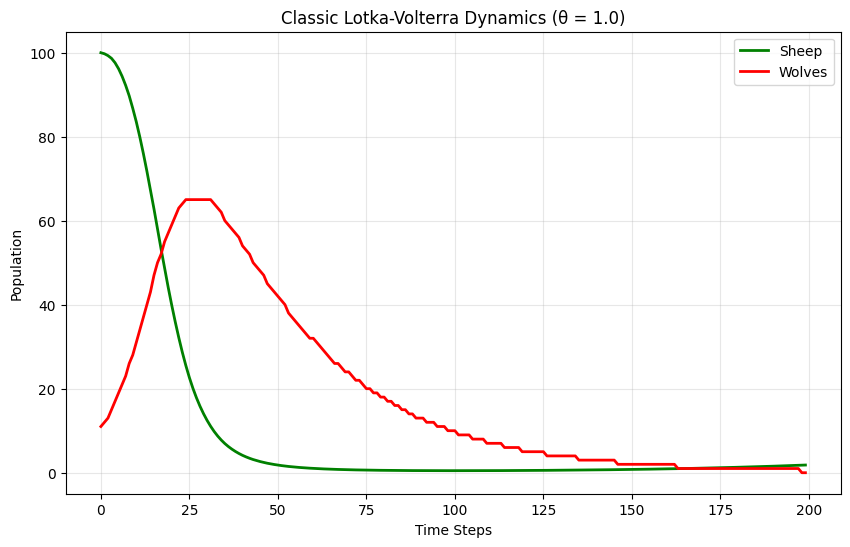

Final populations - Sheep: 1.8, Wolves: 0


In [7]:
# Demo 1: Classic Lotka-Volterra (constant theta = 1.0)
results_constant = run(
    **DEFAULT_PARAMS,
    decision_mode="constant",
    theta_start=1.0,
    steps=200
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_constant['sheep_history'], label='Sheep', color='green', linewidth=2)
plt.plot(results_constant['wolf_history'], label='Wolves', color='red', linewidth=2)
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('Classic Lotka-Volterra Dynamics (θ = 1.0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final populations - Sheep: {results_constant['final_sheep']:.1f}, Wolves: {results_constant['final_wolves']}")


### Demo 2: Adaptive Theta - Mathematical Control

Now let's try the adaptive approach, where theta adjusts based on prey scarcity using the formula:

$$\theta = \frac{1}{1 + k \cdot \frac{s_{max}}{s + \epsilon}}$$

This creates a feedback loop: fewer sheep → lower theta → less hunting


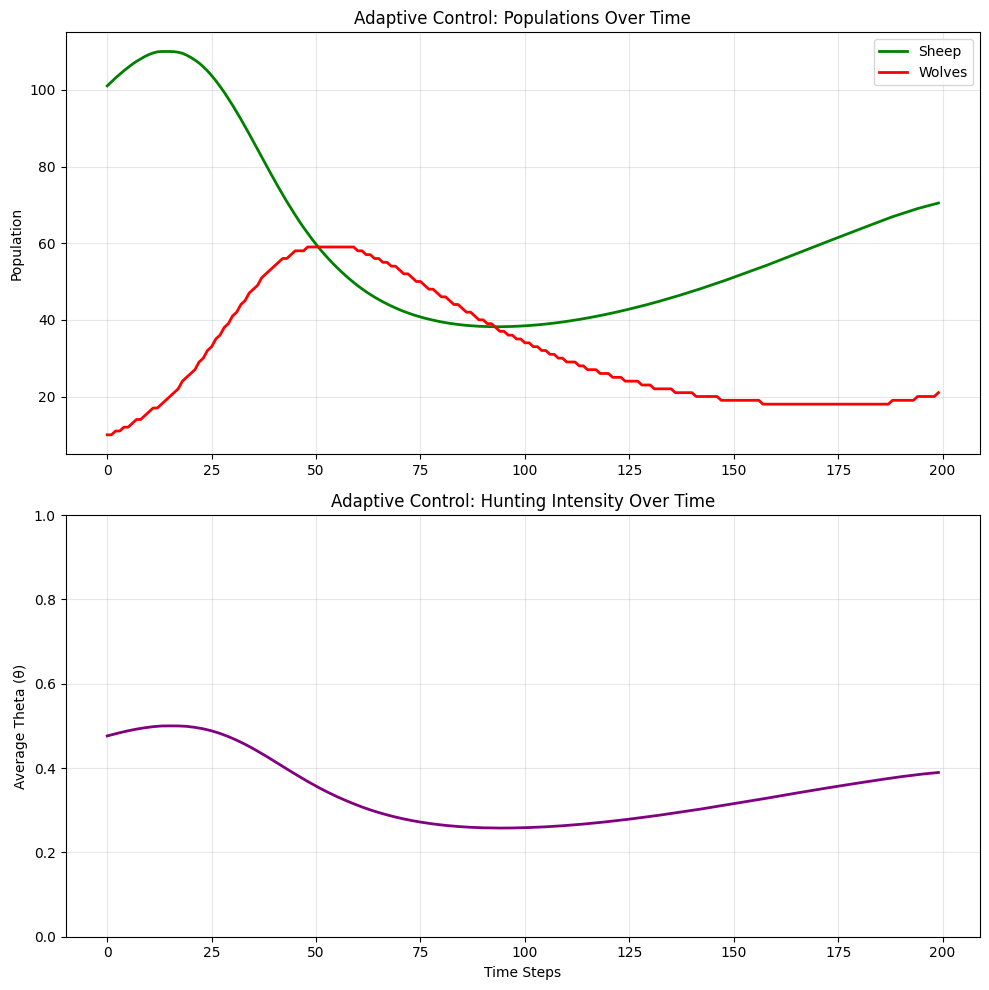

Final populations - Sheep: 70.5, Wolves: 21
The adaptive approach prevented extinction!


In [8]:
# Demo 2: Adaptive theta based on prey scarcity
results_adaptive = run(
    **DEFAULT_PARAMS,
    decision_mode="adaptive",
    theta_start=0.5,  # Starting value (will adapt)
    k=1.0,            # Sensitivity parameter
    steps=200
)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Top plot: Populations
ax1.plot(results_adaptive['sheep_history'], label='Sheep', color='green', linewidth=2)
ax1.plot(results_adaptive['wolf_history'], label='Wolves', color='red', linewidth=2)
ax1.set_ylabel('Population')
ax1.set_title('Adaptive Control: Populations Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: Average theta
ax2.plot(results_adaptive['average_theta_history'], color='purple', linewidth=2)
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Average Theta (θ)')
ax2.set_title('Adaptive Control: Hunting Intensity Over Time')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final populations - Sheep: {results_adaptive['final_sheep']:.1f}, Wolves: {results_adaptive['final_wolves']}")
print(f"The adaptive approach {'prevented extinction!' if results_adaptive['final_wolves'] > 0 else 'failed to prevent extinction.'}")


### Demo 3: AI-Controlled Wolves 🤖

Now for the exciting part! Let's see how AI-controlled wolves perform. The AI receives information about the ecosystem and makes strategic decisions.

Since you have API keys in `.env.local`, this should work automatically!


Running AI-controlled simulation...


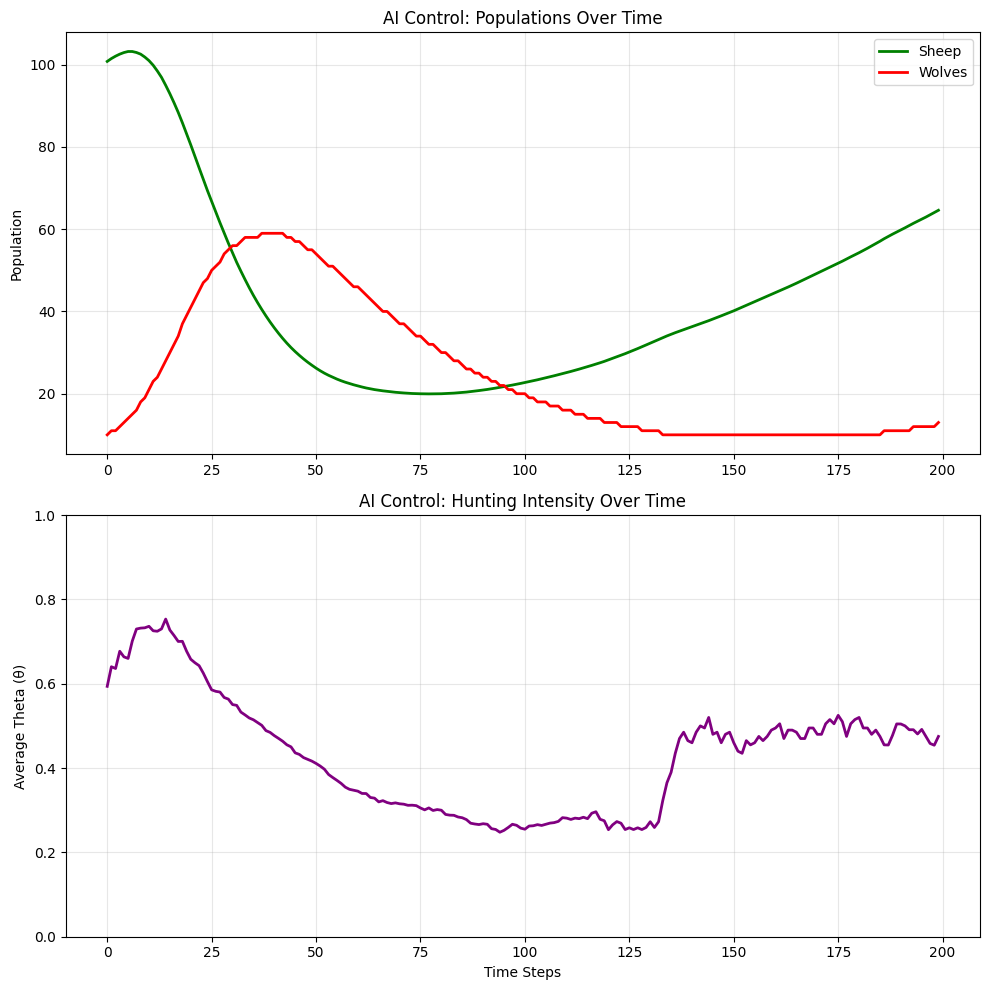


Final populations - Sheep: 64.6, Wolves: 13
Total API cost: $0.1323
The AI approach prevented extinction!


In [9]:
# Demo 3: AI-controlled wolves
print("Running AI-controlled simulation...")

results_ai = run(
    **DEFAULT_PARAMS,
    decision_mode="ai",
    model_name="gpt-4o-mini",    # or "claude-3-5-haiku"
    temperature=0.3,              # Lower = more deterministic
    prompt_type="high",           # "high", "medium", or "low" information
    churn_rate=0.1,              # 10% of wolves make decisions each step
    max_tokens=512,
    theta_start=0.5,
    steps=200
)

# Plot results with AI decisions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Populations
ax1.plot(results_ai['sheep_history'], label='Sheep', color='green', linewidth=2)
ax1.plot(results_ai['wolf_history'], label='Wolves', color='red', linewidth=2)
ax1.set_ylabel('Population')
ax1.set_title('AI Control: Populations Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Average theta
ax2.plot(results_ai['average_theta_history'], color='purple', linewidth=2)
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Average Theta (θ)')
ax2.set_title('AI Control: Hunting Intensity Over Time')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal populations - Sheep: {results_ai['final_sheep']:.1f}, Wolves: {results_ai['final_wolves']}")
print(f"Total API cost: ${results_ai['usage']['cost']:.4f}")
print(f"The AI approach {'prevented extinction!' if results_ai['final_wolves'] > 0 else 'showed interesting dynamics.'}")


### Demo 4: Comparing Different Approaches

Let's run a quick comparison of different theta strategies:


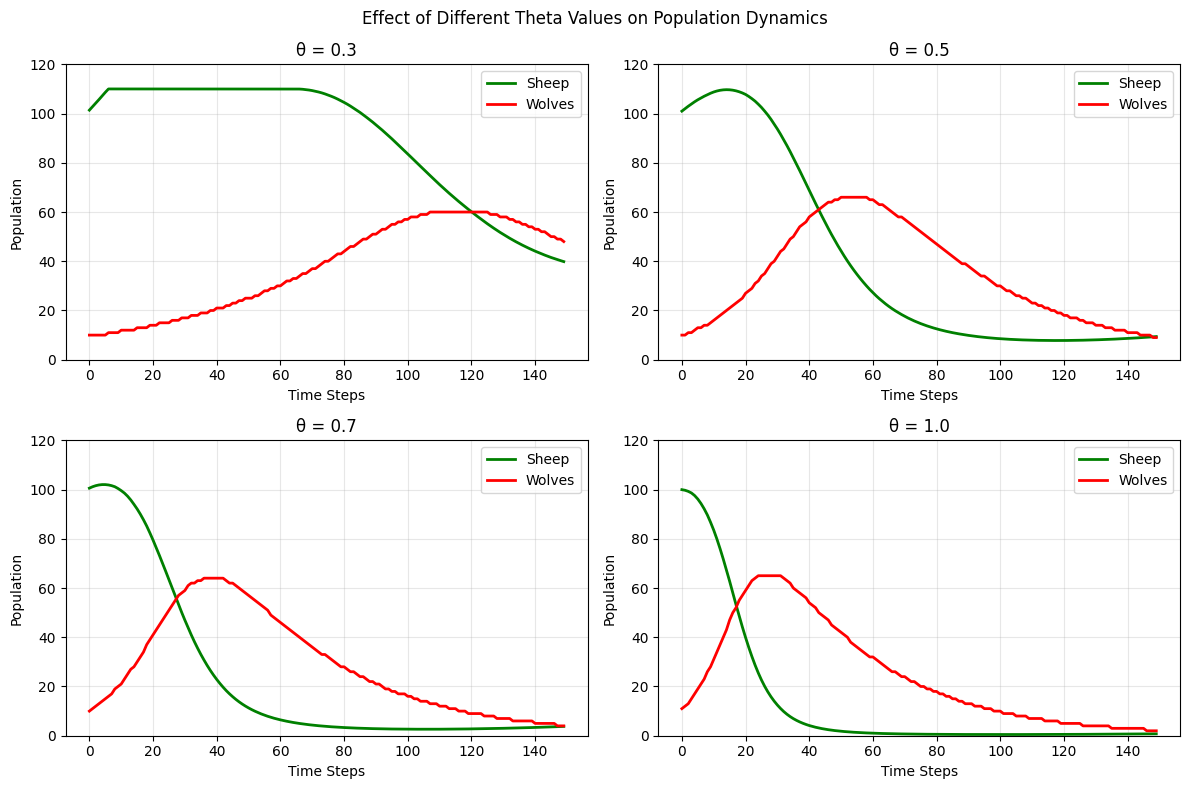

Summary of outcomes:
θ = 0.3: Stable (Final: 40 sheep, 48 wolves)
θ = 0.5: Stable (Final: 9 sheep, 9 wolves)
θ = 0.7: Stable (Final: 4 sheep, 4 wolves)
θ = 1.0: Stable (Final: 1 sheep, 2 wolves)


In [10]:
# Demo 4: Compare different constant theta values
theta_values = [0.3, 0.5, 0.7, 1.0]
results_comparison = {}

for theta in theta_values:
    results = run(
        **DEFAULT_PARAMS,
        decision_mode="constant",
        theta_start=theta,
        steps=150
    )
    results_comparison[theta] = results

# Plot comparison
plt.figure(figsize=(12, 8))

for i, (theta, results) in enumerate(results_comparison.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(results['sheep_history'], label='Sheep', color='green', linewidth=2)
    plt.plot(results['wolf_history'], label='Wolves', color='red', linewidth=2)
    plt.title(f'θ = {theta}')
    plt.xlabel('Time Steps')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 120)

plt.suptitle('Effect of Different Theta Values on Population Dynamics')
plt.tight_layout()
plt.show()

# Summary
print("Summary of outcomes:")
for theta, results in results_comparison.items():
    status = "Stable" if results['final_wolves'] > 0 and results['final_sheep'] > 0 else "Collapsed"
    print(f"θ = {theta}: {status} (Final: {results['final_sheep']:.0f} sheep, {results['final_wolves']:.0f} wolves)")


## Key Insights from Our Research

Through extensive experimentation, we've discovered:

1. **LLMs Can Stabilize Chaotic Systems**: AI-controlled wolves often prevent the boom-bust cycles that plague traditional predator-prey models

2. **Information Matters**: Wolves with more information about the ecosystem make better decisions
   - High information: Detailed context → best stability
   - Medium information: Basic facts → moderate performance  
   - Low information: Minimal context → surprisingly still works!

3. **Imperfection Can Be Good**: LLMs sometimes exhibit "cognitive biases" that actually help stability

4. **Emergent Strategies**: AI wolves develop hunting patterns we didn't explicitly program:
   - Backing off when prey is scarce
   - Increasing competition when wolf density is high
   - Finding sustainable equilibrium points


## Next Steps for New Investigators

### 1. Explore the Codebase
- `model/model.py` - The main simulation engine
- `model/agents.py` - Individual wolf agents
- `model/domain.py` - The ecosystem (sheep population)
- `model/utils/llm_utils.py` - How we communicate with AI

### 2. Run Your Own Experiments
Try modifying parameters to see what happens:
- Change `churn_rate` - How many wolves update their strategy each step?
- Adjust `temperature` - How creative should the AI be?
- Try different `prompt_type` values - Does more information always help?

### 3. Analyze the Data
The system saves detailed logs including:
- Population histories
- Individual wolf decisions
- AI explanations and "vocalizations"
- Token usage and costs

### 4. Research Questions to Explore
- Can we find parameter sets that guarantee stability?
- How do different LLMs compare in their strategies?
- What happens with heterogeneous wolf populations?
- Can we extend this to multi-species ecosystems?

### 5. Running Full Experiments
For serious experiments, use the command-line tools:
```bash
# Run a single simulation
python main.py --steps 500 --model-name gpt-4o-mini

# Run parameter sweeps
python run_experiment.py --preset stability_sweep
```

Welcome to the project! We're excited to see what you discover! 🐺🔬
